<a href="https://colab.research.google.com/github/OmarJames8/Classification_Algos/blob/main/Diabetes_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the nessacry libaries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
#load the dataset 
data = pd.read_csv('/content/drive/MyDrive/Tech I.S/techis-ds-wiki-main/DS/Step 2-5 Unsupervised Learning/01_Clustering/diabetes.csv')


In [3]:
#Perform EDA on the dataset to gain insight
# Display the first few rows of the dataset
print(data.head())

# Check the dimensions of the dataset
print(data.shape)

# Check the summary statistics of the dataset
print(data.describe())

# Check the information about the columns and their data types
print(data.info())

# Check for missing values
print(data.isnull().sum())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.

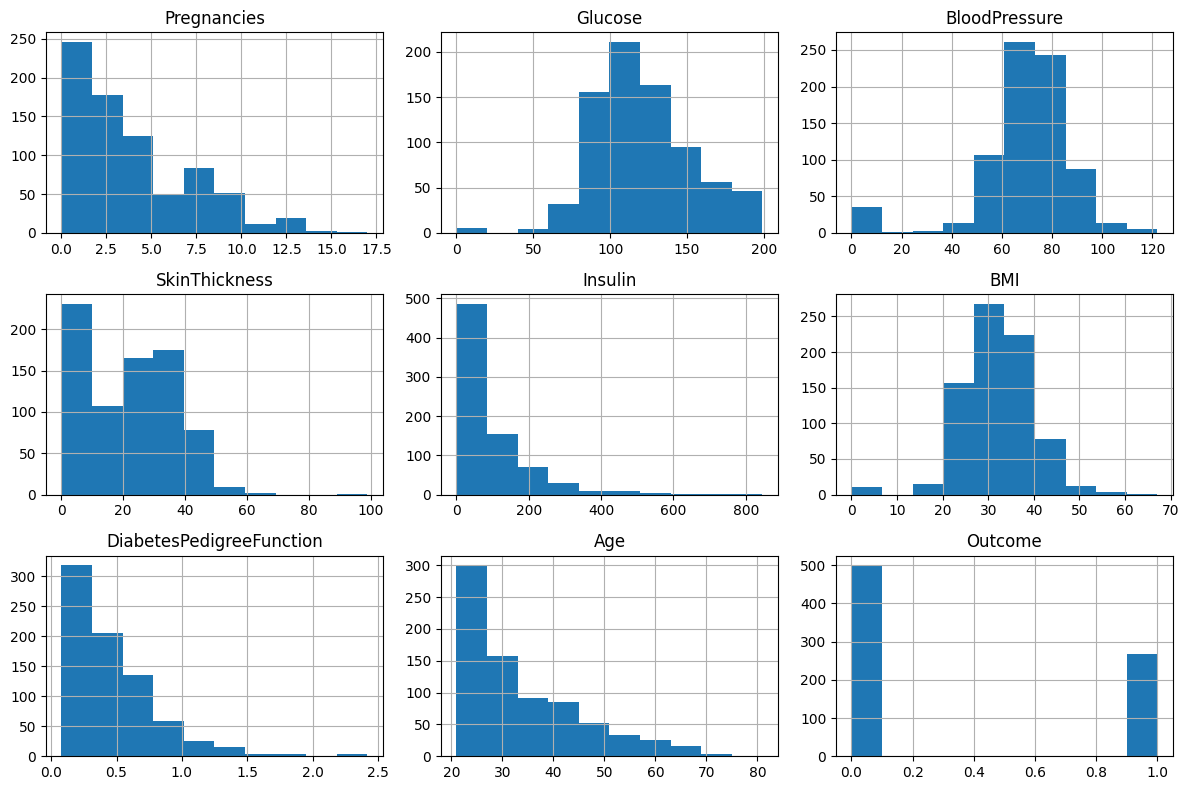

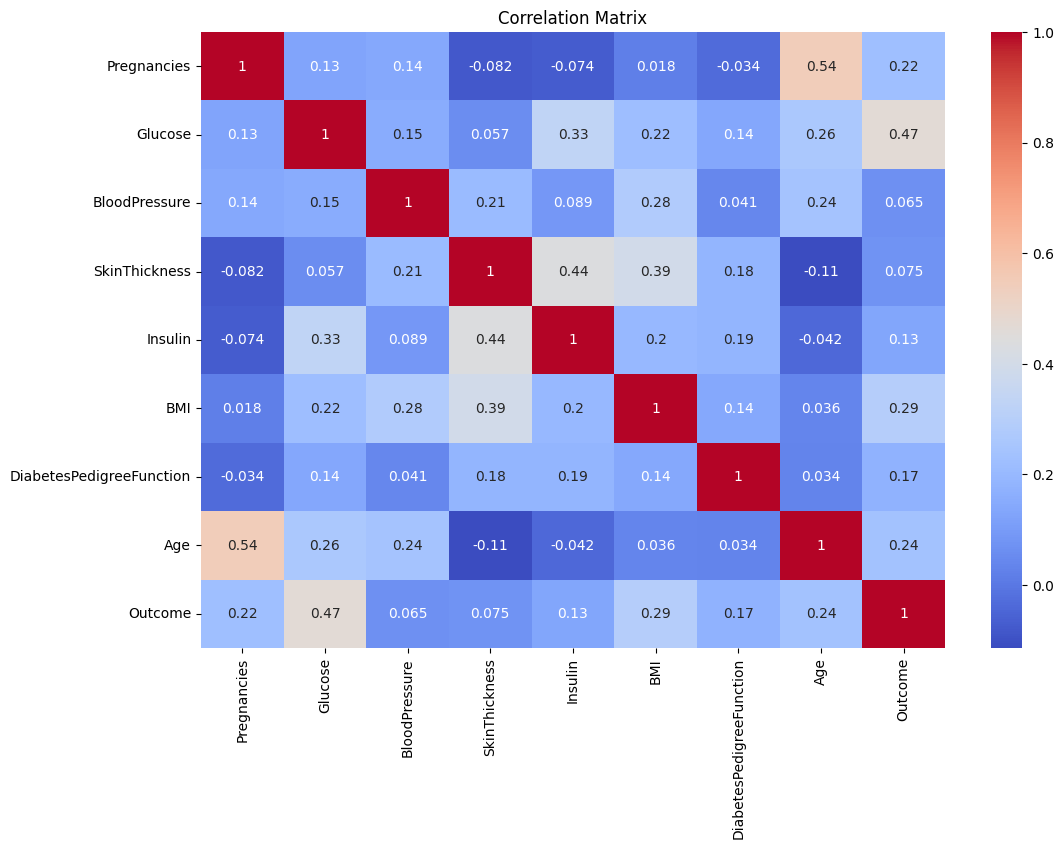

In [4]:
#Lets now visualize the dataset 
# Plot histograms of the features
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Plot correlation matrix as a heatmap
correlation = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
#Prepare the data for clustering
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Display the standardized data
print(data_scaled.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.468492  1.425995  1.365896  
1                 -0.365061 -0.190672 -0.732120  
2                  0.604397 -0.105584  1.365896  
3                 -0.920763 -1.041549 -0.732120  
4                  5.484909 -0.020496  1.365896  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

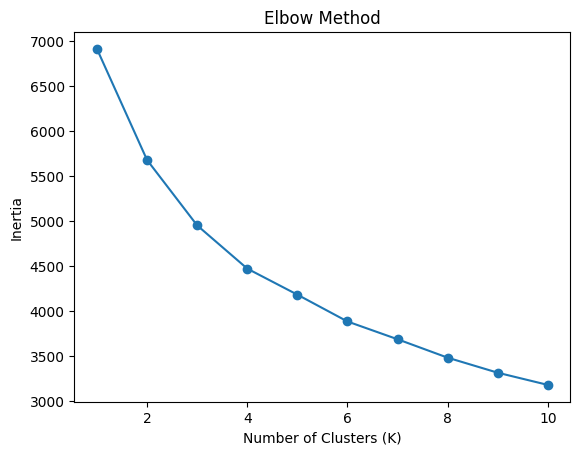

In [6]:
# Perform K-means clustering for different values of K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [9]:
#Applying K-means Clustering with the chosen number of clusters

# Chosen number of clusters (K) based on the elbow method
k = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the updated dataset
print(data.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Cluster  
0                     0.627   50        1        2  
1                     0.351   31        0        1  
2                     0.672   32        1        2  
3                     0.167   21        0        1  
4                     2.288   33        1        0  


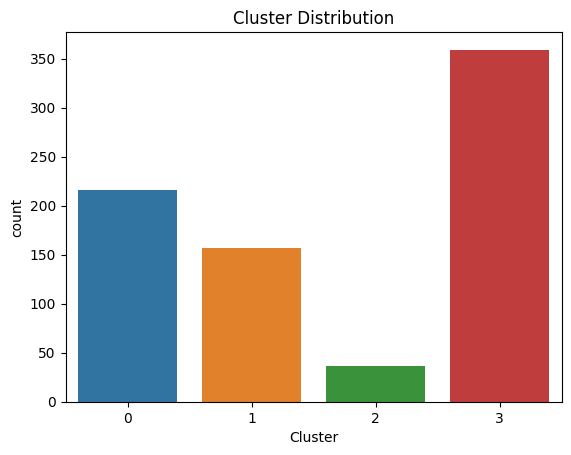

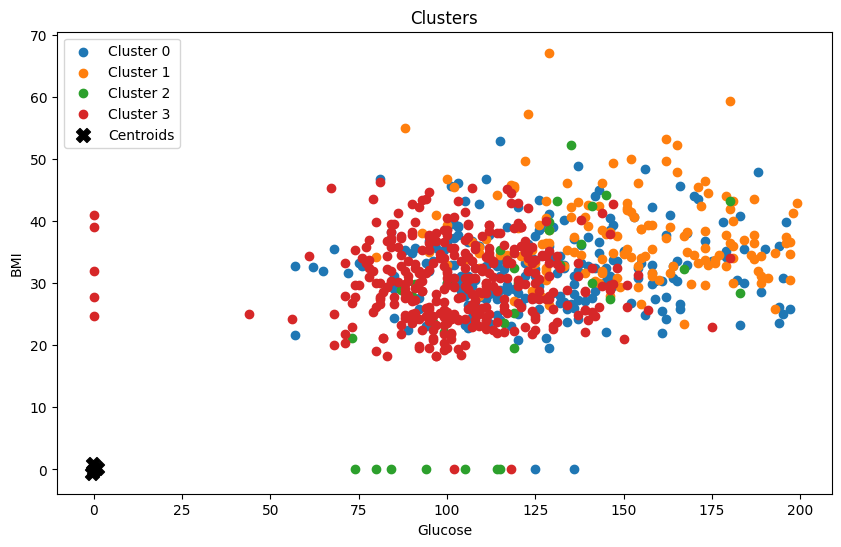

In [8]:
#Analysis of the clusters
# Plot the distribution of the clusters
sns.countplot(x='Cluster', data=data)
plt.title('Cluster Distribution')
plt.show()

# Plot the cluster centroids
plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data['Glucose'], cluster_data['BMI'], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centroids')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters')
plt.legend()
plt.show()


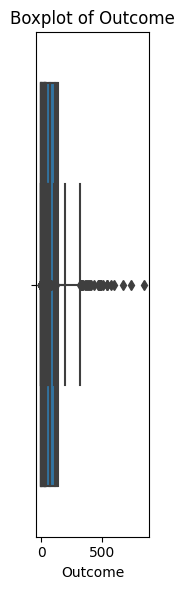

In [ ]:
#Further analysis of the dataset
# Reload the dataset
data = pd.read_csv('/content/drive/MyDrive/Tech I.S/techis-ds-wiki-main/DS/Step 2-5 Unsupervised Learning/01_Clustering/diabetes.csv')

# Boxplots of variables
plt.figure(figsize=(12, 6))
for col in data.columns:
    plt.subplot(1, len(data.columns), i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Scatterplot matrix
sns.pairplot(data=data)
plt.title('Scatterplot Matrix')
plt.show()

# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Importance
from sklearn.ensemble import RandomForestClassifier

X = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target variable
y = data['Outcome']

model = RandomForestClassifier()
model.fit(X, y)

feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
